In [1]:
from scipy.optimize import curve_fit
import numpy as np
import matplotlib.pyplot as plt

%matplotlib widget

In [2]:
R,EV1,EV2,EV3,EV4 = np.loadtxt('CH_ai_postProcessed.dat',delimiter=',',unpack=True)

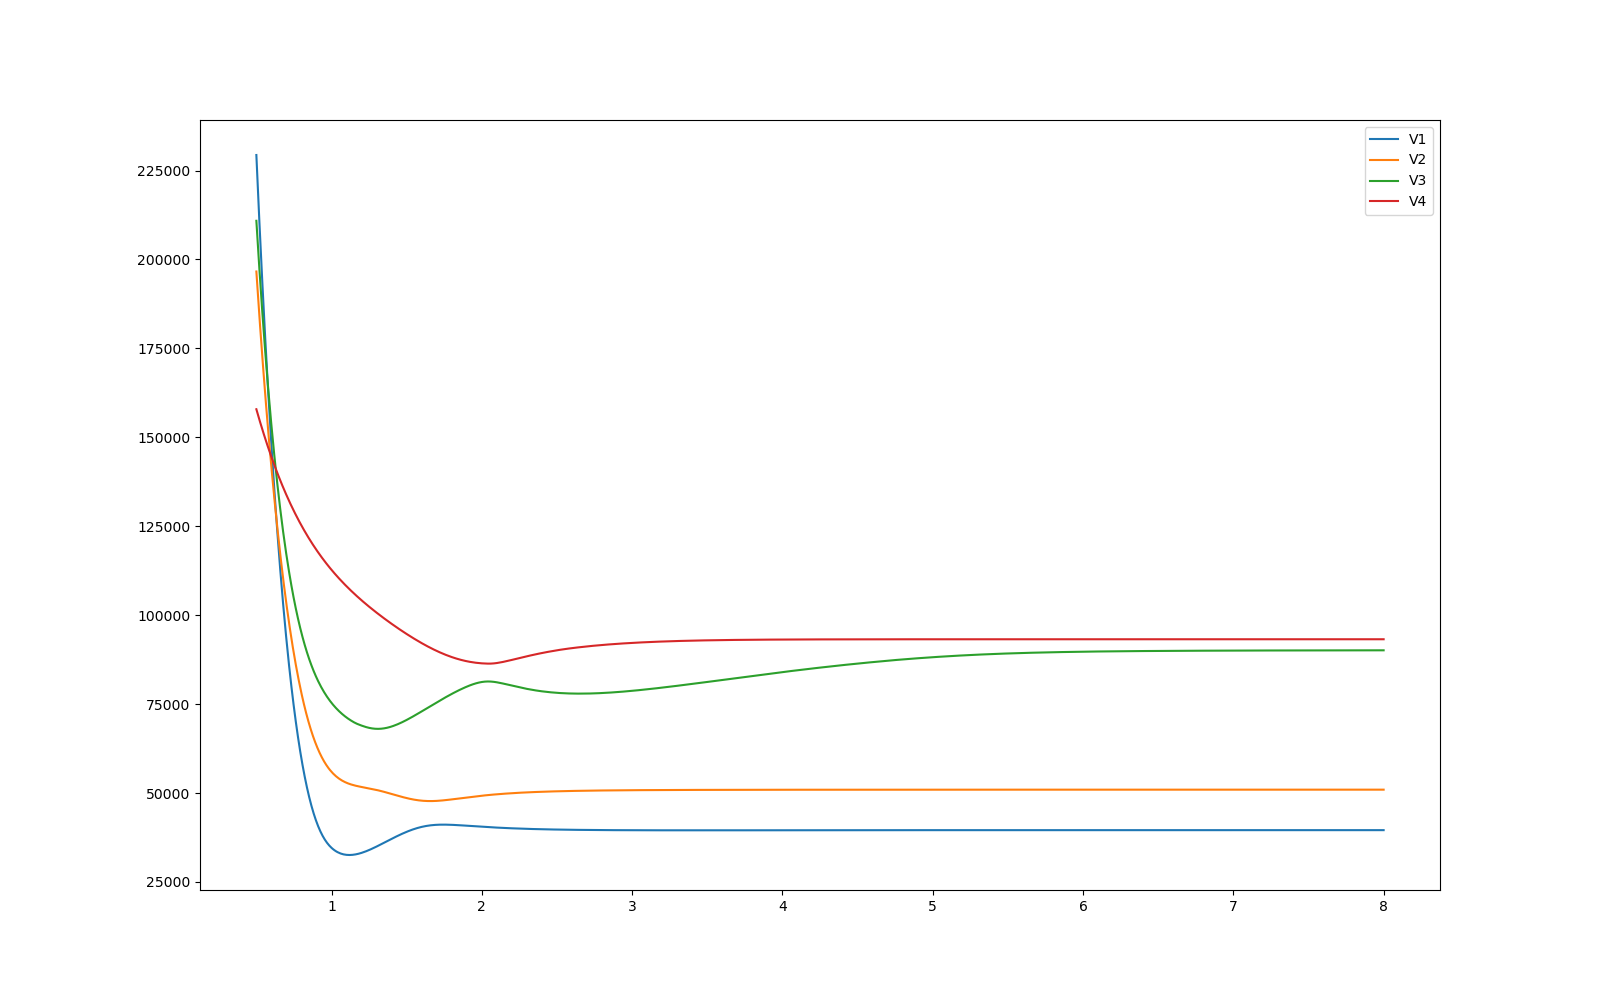

In [3]:
plt.figure(figsize=(16,10))

potens = [EV1,EV2,EV3,EV4-5000]

for i,V in enumerate(potens):
    plt.plot(R,V,label=f"V{1+i}")

plt.legend()


In [4]:
def EMO(r,Ve,Ae,ref,nL=10,nR=10,p=4,b0=0,b1=0,b2=0,b3=0,b4=0,b5=0,b6=0,b7=0,b8=0,b9=0,b10=0,b11=0,b12=0,b13=0,b14=0):
    #
    def EMO_expansion(r,Ve,Ae,ref,n=10,p=4,b0=0,b1=0,b2=0,b3=0,b4=0,b5=0,b6=0,b7=0,b8=0,b9=0,b10=0,b11=0,b12=0,b13=0,b14=0):
        #
        ## Surkus variable
        y = (r**(p)-ref**(p))/(r**(p)+ref**(p))
        #
        ## Summation
        sumList = [b0,b1*y,b2*y**2,b3*y**3,b4*y**4,b5*y**5,b6*y**6,b7*y**7,b8*y**8,b9*y**9,b10*y**10,b11*y**11,b12*y**12,b13*y**13,b14*y**14]
        summ = 0
        n = int(n)
        for element in sumList[:n]:
             summ += element
       
        #
        return Ve+(Ae-Ve)*( 1-np.exp(-(summ*(r-ref))) )**(2)
    #
    ## Surkus variable
    y = (r**(p)-ref**(p))/(r**(p)+ref**(p))
    #
    ## Summation
    if nL!=nR:
        PEC = []
        PEC_L = EMO_expansion(r[r<=ref],Ve,Ae,ref,n=nL,b0=b0,b1=b1,b2=b2,b3=b3,b4=b4,b5=b5,b6=b6,b7=b7,b8=b8,b9=b9,b10=b10,b11=b11,b12=b12,b13=b13,b14=b14)
        PEC_R = EMO_expansion(r[r>ref],Ve,Ae,ref,n=nR,b0=b0,b1=b1,b2=b2,b3=b3,b4=b4,b5=b5,b6=b6,b7=b7,b8=b8,b9=b9,b10=b10,b11=b11,b12=b12,b13=b13,b14=b14)
        PEC.extend(PEC_L)
        PEC.extend(PEC_R)
       
        return np.array(PEC)
    else:
        sumList = [b0,b1*y,b2*y**2,b3*y**3,b4*y**4,b5*y**5,b6*y**6,b7*y**7,b8*y**8,b9*y**9,b10*y**10,b11*y**11,b12*y**12,b13*y**13,b14*y**14]
        summ = 0
        for element in sumList[:nL]:
            summ += element
        #
        print(summ)
        return Ve + (Ae-Ve) * ( 1-np.exp(-(summ*(r-ref))) )**(2)
    
def repulsive(R,Ve,B3,B6):

    return Ve + B3/R**3 + B6/R**6


def sigmoid(R,re,A0,B0):

    return A0 / (1 + np.exp(-B0 * (R-re) ) )




In [5]:
VE2	 = 3.74E+04
RE2	 = 1.10E+00
AE2	 = 5.97E+04
PL	 = 4.00E+00
PR	 = 4.00E+00
NL	 = 0.00E+00
NR	 = 2.00E+00
B0	 = 1.97E+00
B1	 = 0.00E+00
B2	 = 0.00E+00
 
paramsV1 = [PL,PR,NL,NR,B0,B1,B2] 

VE2  =  5.80E+04
RE2	 =  1.14E+00
AE2	 =  7.80E+04
PL	 =  4.00E+00
PR	 =  4.00E+00
NL	 =  0.00E+00
NR	 =  0.00E+00
B0	 =  1.43E+00

paramsV2 = [PL,PR,NL,NR,B0,]





In [6]:
params = np.array([
3.574E+04,
1.10E+00,
6.38E+04,
-1.00E+00,
4.00E+00,
4.00E+00,
0.00E+00,
2.00E+00,
1.97E+00,
0.00E+00,
0.00E+00,
5.60E+04,
1.27E+00,
7.76E+04,
-1.00E+00,
4.00E+00,
4.00E+00,
0.00E+00,
0.00E+00,
1.43E+00,
7.00E+00,
4.97E+04,
0.00E+00,
0.00E+00,
2.91E+04,
0.00E+00,
0.00E+00,
7.03E+04,
7.61E+04,
4.72E+00,
8.06E+04,
-1.00E+00,
4.00E+00,
4.00E+00,
0.00E+00,
0.00E+00,
3.84E-01,
0.00E+00,
1.60E+00,
1.80E+04,
-1.00E+00,
7.00E+00,
1.95E+00,
0.00E+00,
1.12E+00,
5.00E+03,
-1.00E+00,
7.00E+00,
1.15E+00,
0.00E+00,
9.93E-01,
-3.00E+03,
-1.00E+00,
7.00E+00,
9.64E-01,
0.00E+00,
1.18E+00,
1.75E+04,
-1.00E+00,
7.00E+00,
3.02E+00,
0.00E+00,
2.11E+00,
1.00E+04,
-1.00E+00,
7.00E+00,
2.92E+00,
-3.00E+03,
-1.15E+05,
0.00E+00,
-1.00E+00,
4.00E+00,
4.00E+00,
0.00E+00,
0.00E+00,
1.47E+00,
])

In [7]:
param_indices = {
    'V1': slice(0,10)}

In [ ]:
params = np.array([
35743.88695,  #V1
1.102641652,
63760.83451,
1.973284602,
59001.68139,  #V2
1.1,  
78000,
1.43436715,  
49739.66517,  #V3
32071.48036,
-2300,
81000.42376, #V4
2.9,
90638.52558,  
0.73829435,

1.600394287, 
18000,
1.946339502,
1.2049633189014,
5000,
1.2,
3,
-3000,
1.2,
1.1,
17500,
3.021477572,
2.113123734,
-3000,
2.924031461,
-3000,
0.8,
0,
1.9 ])

In [238]:
params = np.array([
32000,    #V1
1.11,
63000,
1.95,
-0.9,
1,
53000,   #V2
1.11,
75000,
2.1,
-0.9,
1,
50000,  #V3
32000,
-2000,
79000,  #V4
2.9,
89000,
0.75,
0.17,
0.1,
1.56173465,  #V12
17805.3242,
2.11579661, 
1.16731057, #V13
4844.44374,
1.15868596,
2.86117554, #V14
-3116.40668,
1.06458727,
1.08628066 ,#V23
18353.279,
2.98656309,
2.26133286 , #V24
-2922.25632,
2.86607295,
-2862.27469, #V34
0.887765999,
0.00014965,
1.8242442
])

params = np.array([
32000,    #V1
1.11,
63000,
1.95,
-0.9,
1,
53000,   #V2
1.11,
75000,
2.1,
-0.9,
1,
50000,  #V3
32000,
-2000,
79000,  #V4
2.9,
89000,
0.75,
0.17,
0.1,
1.600394287, 
18000,
1.946339502,
1.2049633189014,
5000,
1.2,
3,
-3000,
1.2,
1.1,
17500,
3.021477572,
2.113123734,
-3000,
2.924031461,
-3000,
0.8,
0,
1.9 ])

In [239]:
param_indices = {
    'V1': slice(0,6,1),
    'V2': slice(6,12,1),
    'V3': slice(12,15,1),
    'V4': slice(15,21,1),
    'V12': slice(21,24,1),
    'V13' : slice(24,27,1),
    'V14' : slice(27,30,1),
    'V23' : slice(30,33,1),
    'V24' : slice(33,36,1),
    'V34' : slice(36,40,1),
}

In [240]:
P = params[param_indices['V23']]

print(P)

[1.10000000e+00 1.75000000e+04 3.02147757e+00]


1.11


(25000.0, 250000.0)

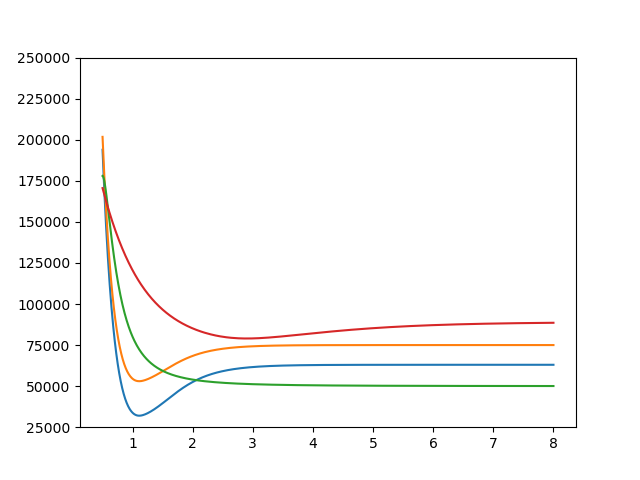

In [241]:
#VR4 = EMO(R,Ve,Ae,re,nL,nR,p,b0,b1,b2)

P = params[param_indices['V1']]

y1 = EMO(R,P[0],P[2],P[1],1,3,4,P[3],P[4],P[5])

P2 = params[param_indices['V2']]

y2 = EMO(R,P2[0],P2[2],P2[1],1,3,4,P2[3],P2[4],P2[5])

X = params[param_indices['V3']]
y3 = repulsive(R,X[0],X[1],X[2])

W = params[param_indices['V4']]
y4 = EMO(R,W[0],W[2],W[1],2,1,4,W[3],W[4],W[5]) 

plt.figure()
print(P[1])
plt.plot(R,y1)
plt.plot(R,y2)
plt.plot(R,y3)
plt.plot(R,y4)

plt.ylim(25000,250000)

In [242]:
npoints = len(R)

target_eigenvalues = np.zeros((npoints,4,4))

for i in range(npoints):

    target_eigenvalues[i,0,0] = EV1[i]
    target_eigenvalues[i,1,1] = EV2[i]
    target_eigenvalues[i,2,2] = EV3[i]
    target_eigenvalues[i,3,3] = EV4[i]

print(target_eigenvalues)

[[[229361.39478204      0.              0.              0.        ]
  [     0.         196613.02503324      0.              0.        ]
  [     0.              0.         210864.751421        0.        ]
  [     0.              0.              0.         162889.0711778 ]]

 [[224620.10735146      0.              0.              0.        ]
  [     0.         193454.98079657      0.              0.        ]
  [     0.              0.         207425.8995587       0.        ]
  [     0.              0.              0.         162155.20761762]]

 [[219956.76505777      0.              0.              0.        ]
  [     0.         190344.52385209      0.              0.        ]
  [     0.              0.         204054.68411968      0.        ]
  [     0.              0.              0.         161429.1801498 ]]

 ...

 [[ 39566.67074888      0.              0.              0.        ]
  [     0.          50948.23628806      0.              0.        ]
  [     0.              0.          

In [243]:



def objective(params, target_eigenvalues):




    matrices = np.zeros((npoints,4,4))

    for i  in range(npoints):
        
        P1 = params[param_indices['V1']]
        matrices[i,0,0] =  EMO(R,P1[0],P1[2],P1[1],1,3,4,P1[3],P1[4],P1[5])[i]  
       
        P2 = params[param_indices['V2']]
        matrices[i,1,1] = EMO(R,P2[0],P2[2],P2[1],1,3,4,P2[3],P2[4],P2[5])[i]  
        
        P3 = params[param_indices['V3']]
        matrices[i,2,2] = repulsive(R,P3[0],P3[1],P3[2])[i]   

        P4 = params[param_indices['V4']]
        matrices[i,3,3] = EMO(R,P4[0],P4[2],P4[1],2,1,4,P4[3],P4[4],P4[5])[i]  

        P12 = params[param_indices['V12']]
        matrices[i,0,1] = sigmoid(R,P12[0],P12[1],P12[2])[i]
        matrices[i,1,0] = sigmoid(R,P12[0],P12[1],P12[2])[i]

        P13 = params[param_indices['V13']]
        matrices[i,0,2] = sigmoid(R,P13[0],P13[1],P13[2])[i]
        matrices[i,2,0] = sigmoid(R,P13[0],P13[1],P13[2])[i]

        P14 = params[param_indices['V14']]
        matrices[i,0,3] = sigmoid(R,P14[0],P14[1],P14[2])[i] 
        matrices[i,3,0] = sigmoid(R,P14[0],P14[1],P14[2])[i] 

        P23 = params[param_indices['V23']]
        matrices[i,1,2] = sigmoid(R,P23[0],P23[1],P23[2])[i]
        matrices[i,2,1] = sigmoid(R,P23[0],P23[1],P23[2])[i]

        P24 = params[param_indices['V24']]
        matrices[i,1,3] = sigmoid(R,P24[0],P24[1],P24[2])[i]
        matrices[i,3,1] = sigmoid(R,P24[0],P24[1],P24[2])[i]

        P34 = params[param_indices['V34']]
        matrices[i,2,3] = EMO(R,P34[0],P34[2],P34[1],1,2,4,P34[3])[i]
        matrices[i,3,2] = EMO(R,P34[0],P34[2],P34[1],1,2,4,P34[3])[i]

        
        E1 = np.zeros(npoints)
        E2 = np.zeros(npoints)
        E3 = np.zeros(npoints)
        E4 = np.zeros(npoints)

        diagonal_matrices = np.zeros((npoints, 4, 4))


        for i in range(npoints):
            eigenvalues, eigenvectors = np.linalg.eig(matrices[i])
            
            eigenvalues = np.sort(eigenvalues)
            
            diagonal_matrices[i] = np.diag(eigenvalues)
        
            E1[i] = diagonal_matrices[i, 0, 0]  
            E2[i] = diagonal_matrices[i, 1, 1] 
            E3[i] = diagonal_matrices[i, 2, 2] 
            E4[i] = diagonal_matrices[i, 3, 3]

            EV1[i] = target_eigenvalues[i,0,0]
            EV2[i] = target_eigenvalues[i,1,1]
            EV3[i] = target_eigenvalues[i,2,2]  
            EV4[i] = target_eigenvalues[i,3,3]

            D1 = EV1 - E1
            D2 = EV2 - E2
            D3 = EV3 - E3
            D4 = EV4 - E4

            return np.sum(D1**2 + D2**2 + D3**2 + D4**2)
            #return np.sum((diagonal_matrices-target_eigenvalues)**2)
            



    
                

In [244]:
initial = objective(params, target_eigenvalues) 

print(initial)


13861672395744.936


In [252]:
from scipy.optimize import minimize

result = minimize(objective, params, args=(target_eigenvalues,), method='BFGS')

# Print the optimized parameters
print("Optimized Parameters:", result.x)
print("Objective Function Value:", result.fun)

Optimized Parameters: [ 3.21214086e+04  1.08750649e+00  6.31589433e+04  2.04429407e+00
 -9.00000000e-01  1.00000000e+00  5.28440806e+04  1.14868062e+00
  7.57747735e+04  1.94491266e+00 -9.00000000e-01  1.00000000e+00
  4.95999883e+04  3.24876798e+04 -1.71405076e+03  7.91649843e+04
  2.79997743e+00  8.89817957e+04  8.03193617e-01  1.49003938e-01
  1.00000000e-01  1.44969272e+00  1.80000000e+04  6.70246130e+00
 -3.20510052e+00  4.92125801e+03 -1.60866310e+00  7.77406478e+00
 -2.92649193e+03  6.50272570e-01  1.61093582e+00  1.75000000e+04
  6.84974097e+00  7.74223620e+00 -3.11427670e+03  8.16258659e-01
 -3.20398494e+03  1.25130159e+00 -6.82985069e+02  1.00493665e+00]
Objective Function Value: 13858346936510.748


In [253]:
print(initial - result.fun)

3325459234.1875


In [254]:
result = np.array(result.x)

In [255]:


def test(result):

    matrices = np.zeros((npoints,4,4))

    for i  in range(npoints):
        result_indices = {
    'V1': slice(0,6,1),
    'V2': slice(6,12,1),
    'V3': slice(12,15,1),
    'V4': slice(15,21,1),
    'V12': slice(21,24,1),
    'V13' : slice(24,27,1),
    'V14' : slice(27,30,1),
    'V23' : slice(30,33,1),
    'V24' : slice(33,36,1),
    'V34' : slice(36,40,1),
}
        

        P1 = result[result_indices['V1']]
        matrices[i,0,0] = EMO(R,P1[0],P1[2],P1[1],1,2,4,P1[3])[i]

        P2 = result[result_indices['V2']]
        matrices[i,1,1] = EMO(R,P2[0],P2[2],P2[1],1,2,4,P2[3])[i]
        
        P3 = result[result_indices['V3']]
        matrices[i,2,2] = repulsive(R,P3[0],P3[1],P3[2])[i]   

        P4 = result[result_indices['V4']]
        matrices[i,3,3] = EMO(R,P4[0],P4[2],P4[1],1,2,4,P4[3])[i]

        P12 = result[result_indices['V12']]
        matrices[i,0,1] = sigmoid(R,P12[0],P12[1],P12[2])[i]
        matrices[i,1,0] = sigmoid(R,P12[0],P12[1],P12[2])[i]

        P13 = result[result_indices['V13']]
        matrices[i,0,2] = sigmoid(R,P13[0],P13[1],P13[2])[i]
        matrices[i,2,0] = sigmoid(R,P13[0],P13[1],P13[2])[i]

        P14 = result[result_indices['V14']]
        matrices[i,0,3] = sigmoid(R,P14[0],P14[1],P14[2])[i]
        matrices[i,3,0] = sigmoid(R,P14[0],P14[1],P14[2])[i]

        P23 = result[result_indices['V23']]
        matrices[i,1,2] = sigmoid(R,P23[0],P23[1],P23[2])[i]
        matrices[i,2,1] = sigmoid(R,P23[0],P23[1],P23[2])[i]

        P24 = result[result_indices['V24']]
        matrices[i,1,3] = sigmoid(R,P24[0],P24[1],P24[2])[i]
        matrices[i,3,1] = sigmoid(R,P24[0],P24[1],P24[2])[i]

        P34 = result[result_indices['V34']]
        matrices[i,2,3] = EMO(R,P34[0],P34[2],P34[1],1,2,4,P34[3])[i]
        matrices[i,3,2] = EMO(R,P34[0],P34[2],P34[1],1,2,4,P34[3])[i]

        
        E1 = np.zeros(npoints)
        E2 = np.zeros(npoints)
        E3 = np.zeros(npoints)
        E4 = np.zeros(npoints)

        diagonal_matrices = np.zeros((npoints, 4, 4))


    for i in range(npoints):
        eigenvalues, eigenvectors = np.linalg.eig(matrices[i])
        
        eigenvalues = np.sort(eigenvalues)
        
        diagonal_matrices[i] = np.diag(eigenvalues)
    
        E1[i] = diagonal_matrices[i, 0, 0]  
        E2[i] = diagonal_matrices[i, 1, 1] 
        E3[i] = diagonal_matrices[i, 2, 2] 
        E4[i] = diagonal_matrices[i, 3, 3]
    
    
    
    
    plt.figure(figsize=(16,10))
    plt.plot(R,E1,label='E1')
    plt.plot(R,E2,label='E2')
    plt.plot(R,E3,label='E3')
    plt.plot(R,E4,label='E4')
    
    for i,V in enumerate(potens):
        plt.plot(R,V,label=f"V{1+i}",ls='--',alpha=0.5)

    plt.legend()

    plt.ylim(25000,180000)

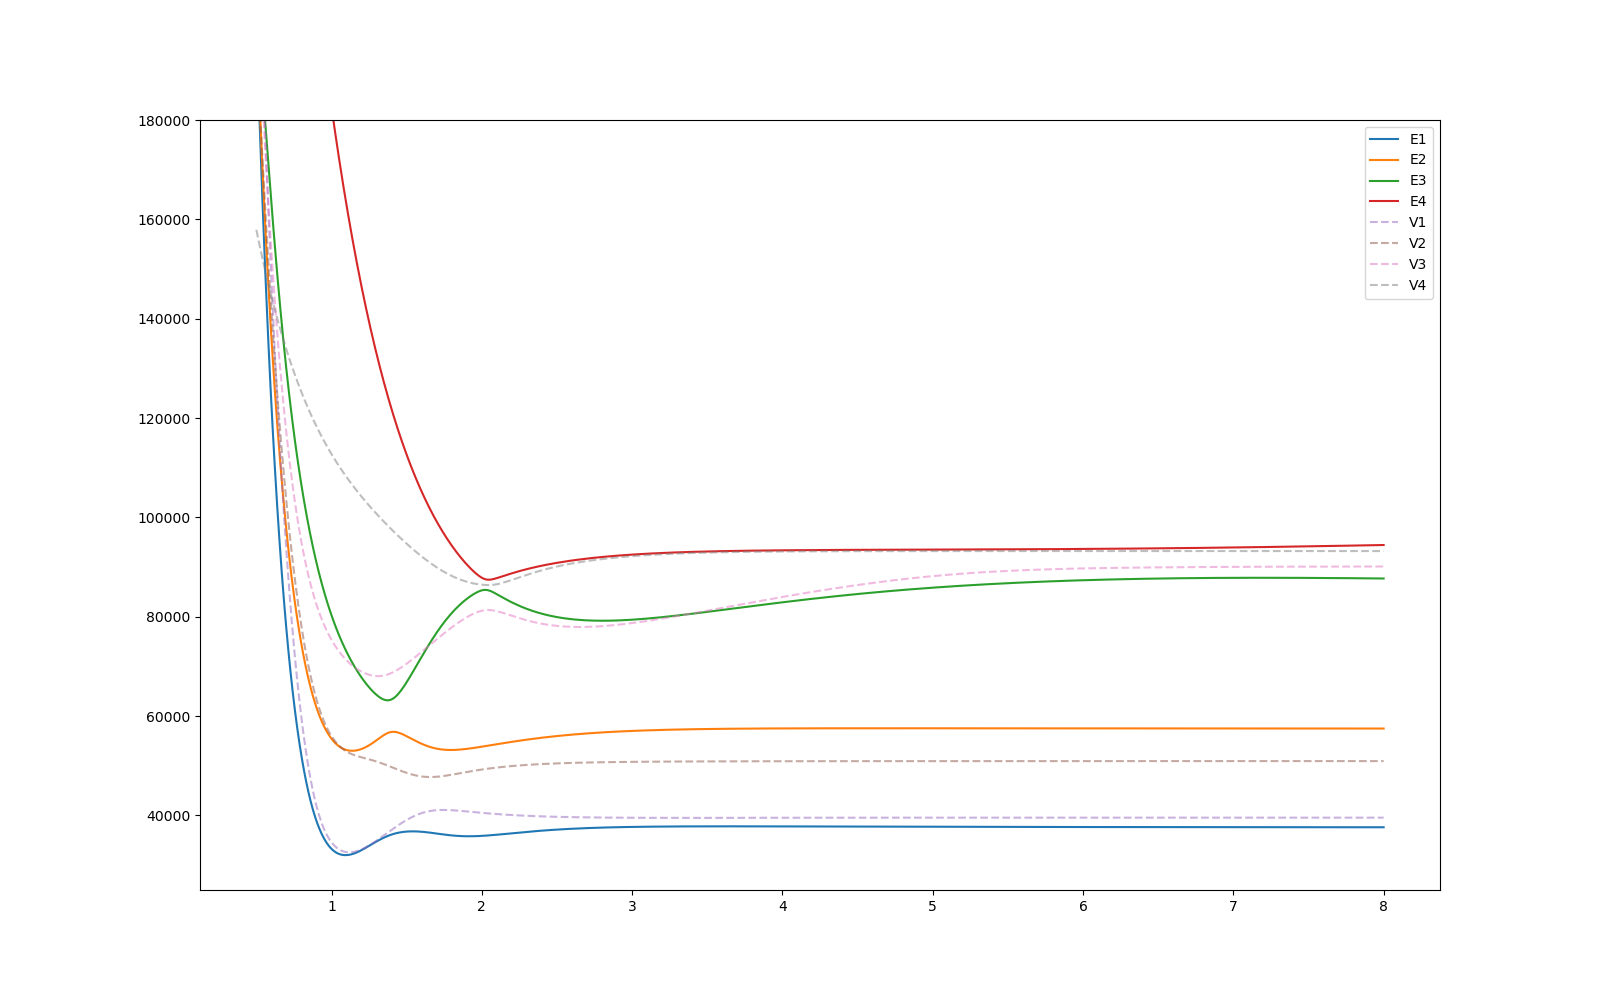

In [256]:
test(result)

In [26]:
result2 = minimize(objective, result, args=(target_eigenvalues,), method='Nelder-Mead')

# Print the optimized parameters
print("Optimized Parameters:", result2.x)
print("Objective Function Value:", result2.fun)

Optimized Parameters: [ 3.59658959e+04  1.12168568e+00  6.52368709e+04  1.95285310e+00
  5.76934781e+04  1.29118838e+00  8.55875553e+04  1.49304066e+00
  4.43616082e+04  3.52941851e+04 -1.98023055e+03  8.22140101e+04
  2.90059929e+00  8.82297537e+04  7.04377678e-01  2.26265372e+00
  4.32128962e+03  5.17475137e+00  2.34478263e+00  3.34860427e+03
  5.32199048e+00  4.25939498e+00  2.15071450e+03  1.65290130e+00
  2.23196119e+00 -1.20455618e+04  4.58140691e+00  4.28500800e+00
  7.83702409e+03  2.74318425e+00 -1.93562584e+01  9.04211443e-01
 -3.08721740e-05  1.72817175e+00]
Objective Function Value: 13858339052590.014


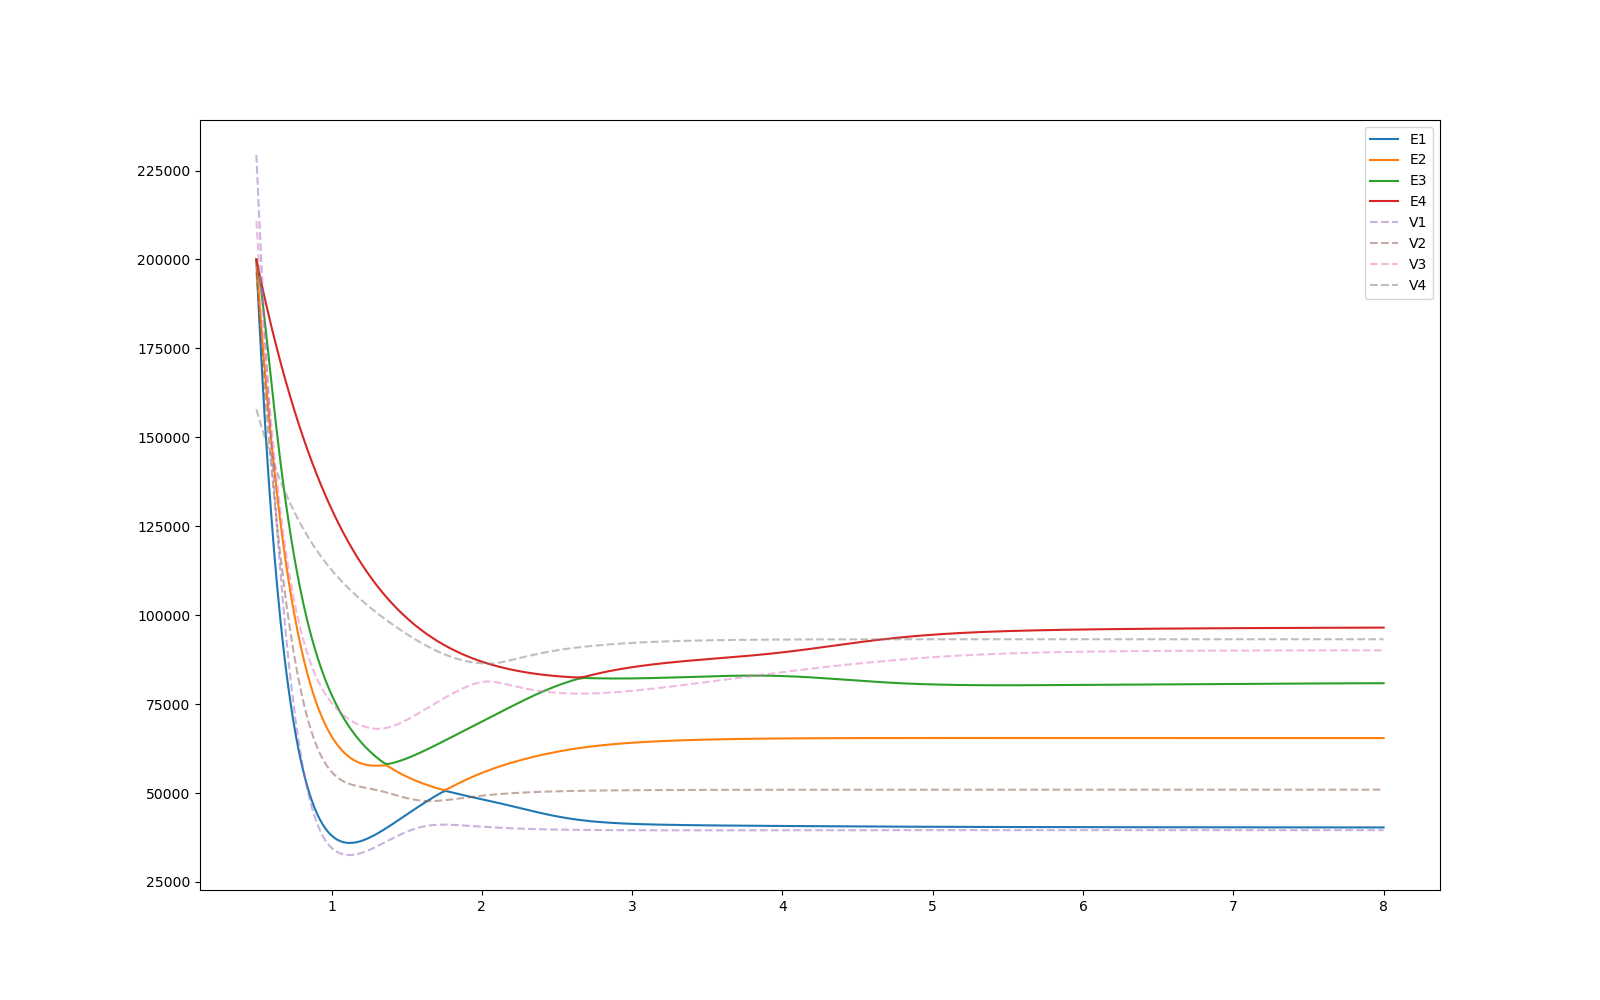

In [27]:
result2 = np.array(result2.x)

test(result2)

In [28]:
result3 = minimize(objective, result2, args=(target_eigenvalues,), method='Nelder-Mead')

# Print the optimized parameters
print("Optimized Parameters:", result3.x)
print("Objective Function Value:", result3.fun)

Optimized Parameters: [ 3.59717194e+04  1.12166558e+00  6.52374378e+04  1.95282383e+00
  5.76944193e+04  1.29108434e+00  8.55885985e+04  1.49307729e+00
  4.43550799e+04  3.52913047e+04 -1.98055998e+03  8.22153880e+04
  2.90045503e+00  8.82302690e+04  7.04369445e-01  3.02890278e+00
  6.31891614e+03  6.21368223e+00  2.49116751e+00  2.64223731e+03
  7.08219247e+00  6.73379951e+00 -1.99074715e+03  2.81049868e+00
  3.44540096e+00  6.50926368e+03  6.66652212e+00  3.84997144e+00
  2.22266228e+04  4.84522822e+00  2.65073094e+01  8.87179616e-01
 -2.23122785e-05  1.79026960e+00]
Objective Function Value: 13858338586034.719


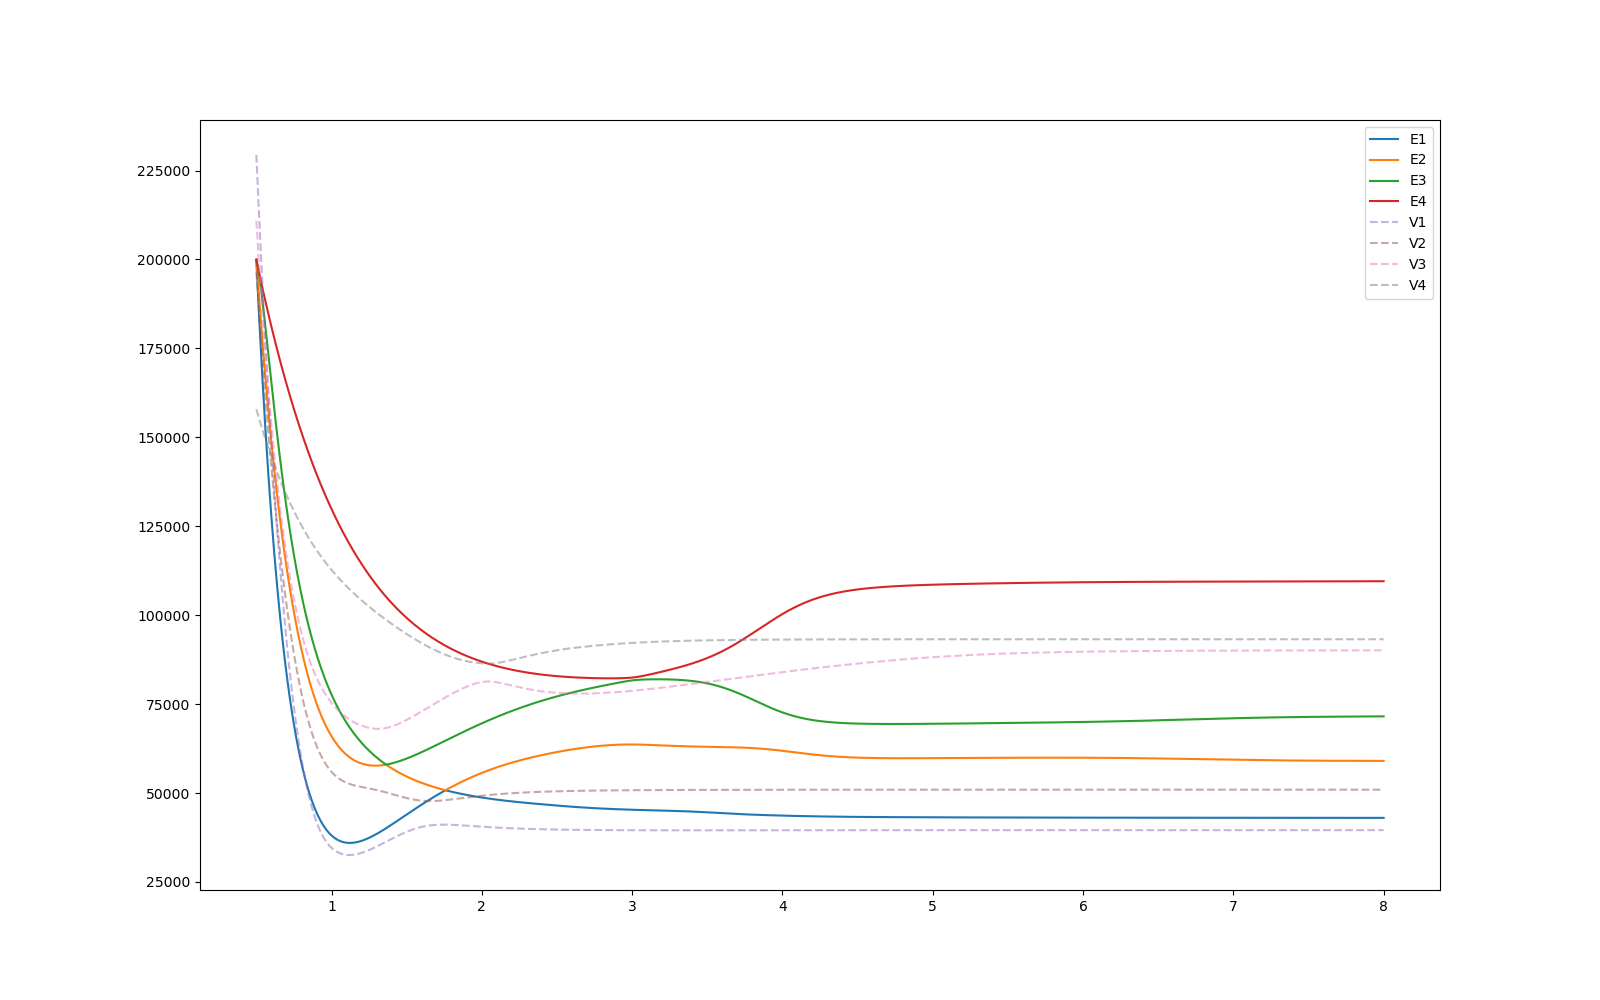

In [29]:
result3 = np.array(result3.x)

test(result3)